In [1]:
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares
import re
%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}
base_colors = {"sdssg":"green", "sdssi":"blue", "sdssr":"red", "sdssz":"magenta"}

import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools

import sncosmo
import lsst.daf.persistence as dafPersist

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production"

In [3]:
patches=[]
patches_file=open(DATADIR+"/patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()

In [4]:
test_date = '2004-03-19'

def plot_detections_on_path(path, date):
    directory = DATADIR+"/"+path
    butler = dafPersist.Butler(directory) 
    

    detections = []
    for patch in patches:
            dataId = {"patch":patch,"filter":'r', "date":date, 'tract':0}
            if butler.datasetExists("dayDiff_class_diaSrc", dataId):
                dayDiff_cat = butler.get("dayDiff_class_diaSrc", dataId)
                detections.append(len(dayDiff_cat))

    plt.hist(detections, bins=25)
    plt.show
    print np.sum(detections)
    return (np.sum(detections))

40838


40838

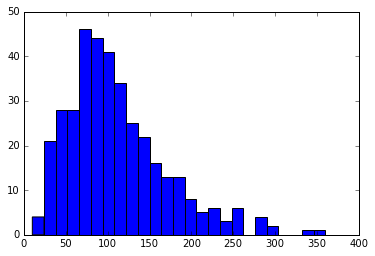

In [77]:
plot_detections_on_path("difference_test_0", test_date)

42921


42921

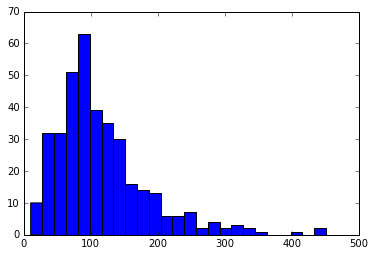

In [6]:
plot_detections_on_path("difference_test_1", test_date)

40838


40838

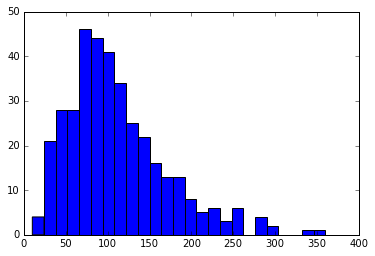

In [7]:
plot_detections_on_path("difference_test_2", test_date)

40838


40838

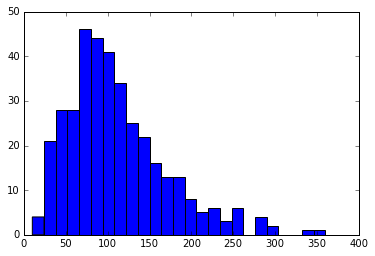

In [76]:
plot_detections_on_path("difference_test_3", test_date)

41187


41187

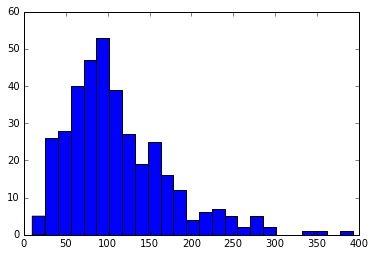

In [9]:
plot_detections_on_path("difference_test_4", test_date)

40863


40863

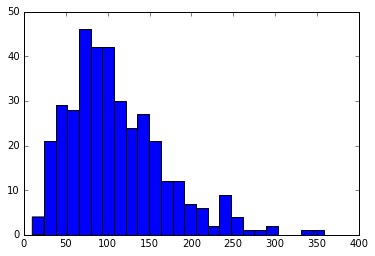

In [10]:
plot_detections_on_path("difference_test_5", test_date)

40888


40888

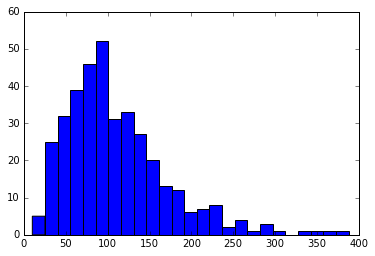

In [11]:
plot_detections_on_path("difference_test_6", test_date)

40449


40449

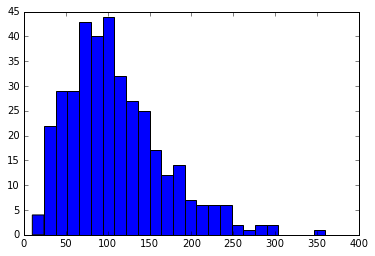

In [12]:
plot_detections_on_path("difference_test_7", test_date)

58549


58549

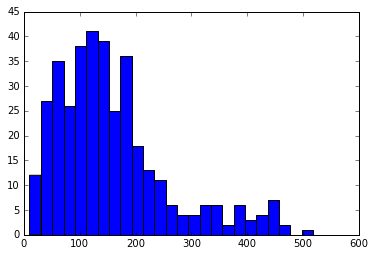

In [13]:
plot_detections_on_path("difference_test_8", test_date)

39979


39979

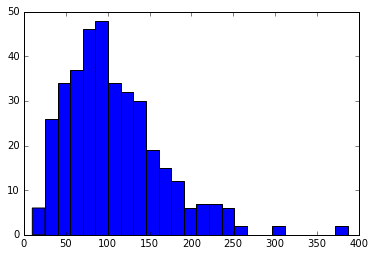

In [14]:
plot_detections_on_path("difference_test_9", test_date)

41389


41389

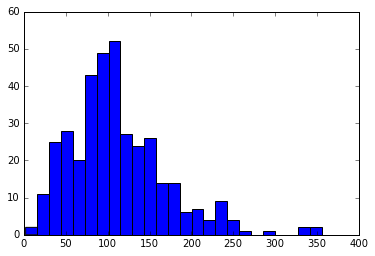

In [15]:
plot_detections_on_path("difference_test_10", test_date)

40838


40838

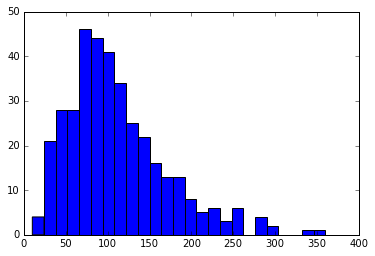

In [16]:
plot_detections_on_path("difference_test_11", test_date)


40838


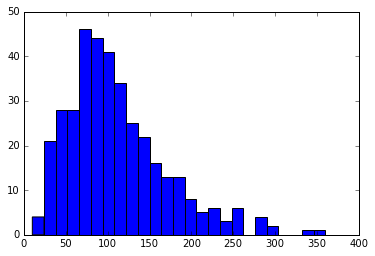

41028


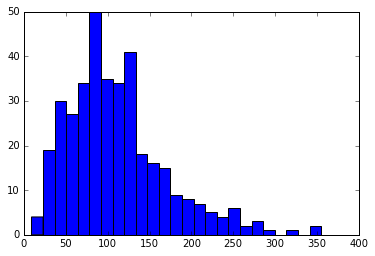

40106


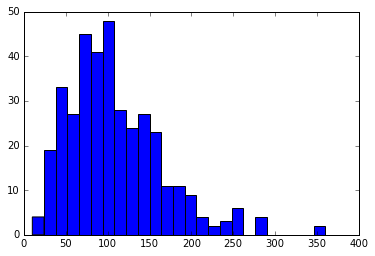

In [17]:
plot_detections_on_path("difference_test_12", test_date)
plt.show()
plot_detections_on_path("difference_test_13", test_date)
plt.show()
plot_detections_on_path("difference_test_14", test_date)
plt.show()

40553


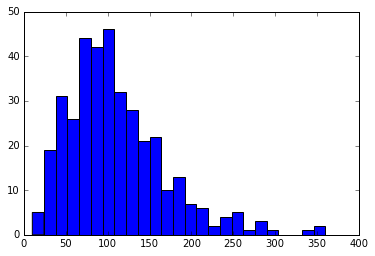

In [18]:
plot_detections_on_path("difference_test_15", test_date)
plt.show()

40838


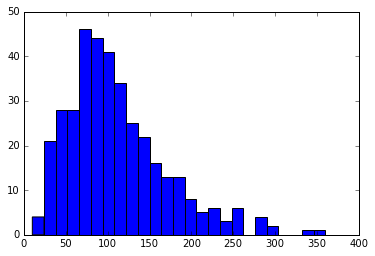

In [19]:
plot_detections_on_path("difference_test_16", test_date)
plt.show()

40106


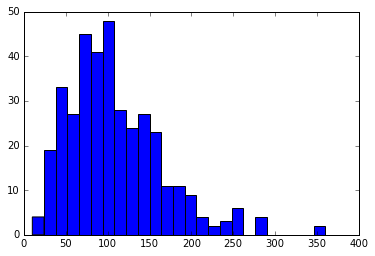

40106


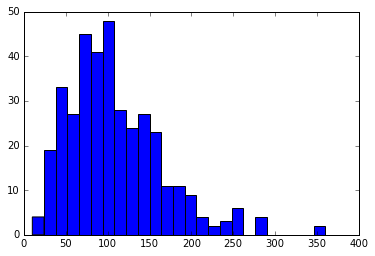

39979


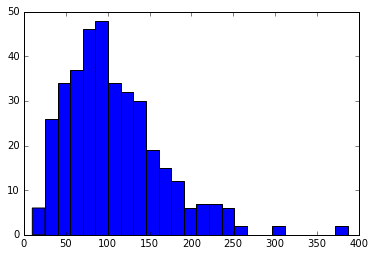

In [20]:
plot_detections_on_path("difference_test_17", test_date)
plt.show()
plot_detections_on_path("difference_test_18", test_date)
plt.show()
plot_detections_on_path("difference_test_19", test_date)
plt.show()

41435


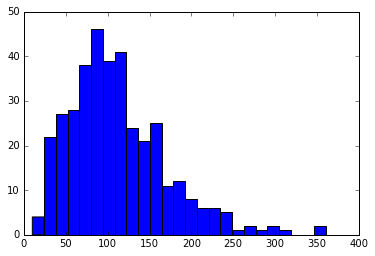

43412


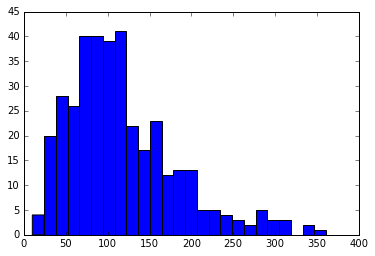

40838


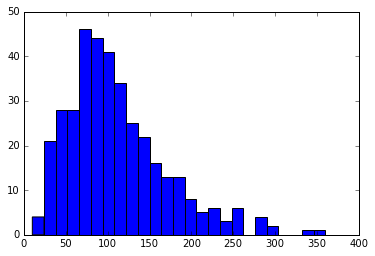

In [21]:
plot_detections_on_path("difference_test_20", test_date)
plt.show()
plot_detections_on_path("difference_test_21", test_date)
plt.show()
plot_detections_on_path("difference_test_22", test_date)
plt.show()

41635


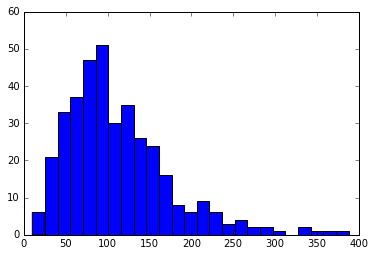

38981


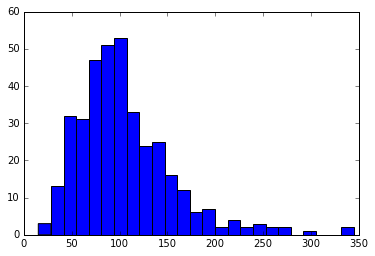

In [22]:
plot_detections_on_path("difference_test_23", test_date)
plt.show()
plot_detections_on_path("difference_test_24", test_date)
plt.show()

40838
42921
40838
42921
41187
40863
40888
40449
58549
39979
41389
40838
40838
41028
40106
40553
40838
40106
40106
39979
41435
43412
40838
41635
38981


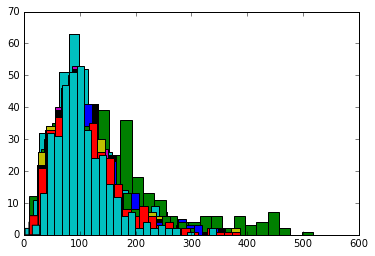

In [23]:
values = []
for i in range(0,25):
    values.append(plot_detections_on_path("difference_test_"+str(i),  test_date))

In [24]:
Changes = ["Base", "Base", "kernelBasis 41", "kernelBasis 11", "starsPerCell5", "starsPerCell2",
          "SingleKernelClipping False", "KernelSumClipping False", "SpatialKernelClipping False", "SingleAndSumKernelClipping False",
          "UseCoreStats True", "UseBICForKernelBasis", "conditionTypeNumber SVD", "CoreStats True coreRadius 5",
          "checkConditionNumber True", "maxConditionNumber 10e7", "maxConditionNumber 2.5e7", "maxSpatialCondition 2e10",
          "maxSpatialCondition 0.5e10", "SingleAndSumKernelClipping False", "candidatesResiualMeanMax 0.5",
          "candidatesResiualMeanMax 0.125", "candidateResidualStdMax 0.75", "candidateResidualStdMax 3.0", 
          "kernelBasisSet DF"]

In [81]:
base_dict = {}
for key, detections in zip(Changes, values):
    if key not in base_dict.keys():
        base_dict[key] = detections

In [82]:
import collections
o_dict = collections.OrderedDict(sorted(base_dict.items(), key=lambda t: t[1]))

In [83]:
o_dict

OrderedDict([('kernelBasisSet DF', 38981),
             ('SingleAndSumKernelClipping False', 39979),
             ('checkConditionNumber True', 40106),
             ('maxSpatialCondition 0.5e10', 40106),
             ('maxSpatialCondition 2e10', 40106),
             ('KernelSumClipping False', 40449),
             ('maxConditionNumber 10e7', 40553),
             ('maxConditionNumber 2.5e7', 40838),
             ('kernelBasis 41', 40838),
             ('Base', 40838),
             ('candidateResidualStdMax 0.75', 40838),
             ('conditionTypeNumber SVD', 40838),
             ('UseBICForKernelBasis', 40838),
             ('starsPerCell2', 40863),
             ('SingleKernelClipping False', 40888),
             ('CoreStats True coreRadius 5', 41028),
             ('starsPerCell5', 41187),
             ('UseCoreStats True', 41389),
             ('candidatesResiualMeanMax 0.5', 41435),
             ('candidateResidualStdMax 3.0', 41635),
             ('kernelBasis 11', 42921),
      

In [91]:
par_array = []
instructions = []
for parameter in o_dict.keys():
        sub_insts = o_dict[parameter][0]
        instruction = chain_instruction(option_prefix, parameter, o_dict[parameter][-1])

        for sub_parameter in sub_insts.keys():
                sub_array = chain_instruction(option_prefix, sub_parameter, sub_insts[sub_parameter])
                for i, line in enumerate(instruction):
                        instruction[i] += " "+sub_array[0]
        instructions.extend(instruction)


IndexError: invalid index to scalar variable.

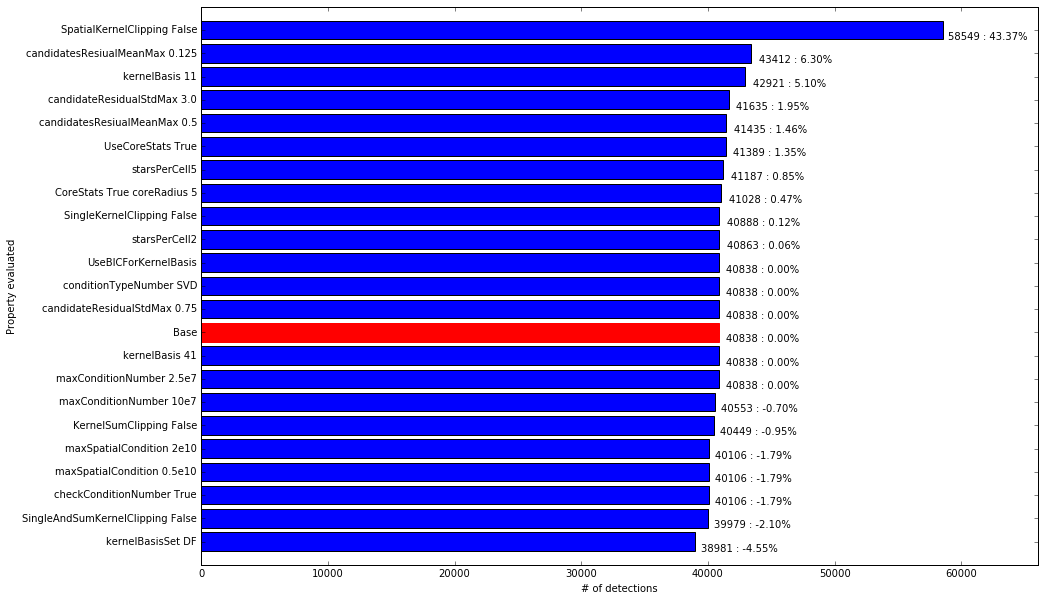

In [86]:
from pylab import *
fig, ax = plt.subplots(figsize=(15,10))


rects = ax.barh(arange(len(o_dict)), list(o_dict.values()), align='center', tick_label=list(o_dict.keys()))
ax.set_yticks(range(len(o_dict.values())))
ax.set_yticklabels(o_dict.keys())
ax.set_xlim(xmax=np.max(o_dict.values())+7500)
ax.set_ylim(ymin=-1, ymax=len(o_dict))
base = o_dict["Base"]

for i, rect in enumerate(rects):
    width = rect.get_width()
    percentage = ((width-base)/base)*100
    #ax.text( width+2000, i-0.5, (str(int(width)) + ": "+str(percentage)+"%.2f%", ha='center', va='bottom')
    ax.text( width+3500, i-0.5, str(int(width))+" : "+("%.2f"%percentage)+"%", ha='center', va='bottom')

rects[9].set_color('r')

ax.set_ylabel("Property evaluated")
ax.set_xlabel("# of detections")

plt.show()

In [48]:

print rect.get

_nolegend_


In [128]:
val

array([  4.44594151,   9.65930558,  10.91764676,   6.19695284,   9.5405476 ])